<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import os
import pandas as pd
import numpy as np
from tensorflow import keras
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
book = 'C:/Users/Ryan/Desktop/Year 2 Sem 1/DL/Assignment 2/Harry_Potter_Book1.txt'
text = open(book, 'rb').read().decode(encoding="utf-8") #rb = read binary
# print(len(book))
# print("Number of characters: ", len(book))

chars = sorted(list(set(text)))
print(chars)
print("Number of unique characters: ", len(chars))

['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '—', '‘', '’', '“', '”', '•', '■']
Number of unique characters:  84


### 1.2 Data Processing


In [3]:
for i in range(2, 349):
    remove_page = f"Page | {i} Harry Potter and the Philosophers Stone - J.K. Rowling "
    remove_page_alt = f"Page | {i} Harry Potter and the Philosophers Stone -J.K. Rowling "
    text = text.replace(remove_page, "")
    text = text.replace(remove_page_alt, "")
text = text.replace("/", "", 1)
text = text.replace("/", "f ", 1)
text = text.replace("/", "I", 1)
text = text.replace("/", "f ", 1)
text = text.replace("/", "I")
text = text.replace("•k k k ", "")
text = text.replace("■", "")

text = text.lower()
print(text)


# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)



# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
# print('len(x): ',len(x))
# print('x[0]: ',x[0])
# print('len(y): ',len(y))
# print('y[0]: ',y[0])

print("Successful.")

 




the boy who lived 

mr. and mrs. dursley, of number four, privet drive, 
were proud to say that they were perfectly normal, 
thank you very much. they were the last people you’d 
expect to be involved in anything strange or 
mysterious, because they just didn’t hold with such 
nonsense. 

mr. dursley was the director of a firm called 
grunnings, which made drills. he was a big, beefy 
man with hardly any neck, although he did have a 
very large mustache. mrs. dursley was thin and 
blonde and had nearly twice the usual amount of 
neck, which came in very useful as she spent so 
much of her time craning over garden fences, spying 
on the neighbors. the dursley s had a small son 
called dudley and in their opinion there was no finer 
boy anywhere. 

the dursleys had everything they wanted, but they 
also had a secret, and their greatest fear was that 
somebody would discover it. they didn’t think they 
could bear it if anyone found out about the potters. 
mrs. potter was mrs. dursle

Successful.


## Step 2 – Develop Character Generator Model

### Model 1 - SimpleRNN Model

In [43]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))


optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


# for epoch in range(1, 4):
#     print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
history = model.fit(x, y,
            batch_size=128,
            epochs=20,
            validation_split = 0.2,
            )

model.save('part2_model1.h5')

model.summary()

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/20
941/941 [==============================] - 26s 27ms/step - loss: 2.2946 - accuracy: 0.3483 - val_loss: 2.0469 - val_accuracy: 0.4132
Epoch 2/20
941/941 [==============================] - 25s 27ms/step - loss: 2.0079 - accuracy: 0.4186 - val_loss: 1.9575 - val_accuracy: 0.4381
Epoch 3/20
941/941 [==============================] - 26s 27ms/step - loss: 1.9295 - accuracy: 0.4395 - val_loss: 1.9248 - val_accuracy: 0.4481
Epoch 4/20
941/941 [==============================] - 26s 27ms/step - loss: 1.8858 - accuracy: 0.4504 - val_loss: 1.8946 - val_accuracy: 0.4486
Epoch 5/20
941/941 [==============================] - 26s 27ms/step - loss: 1.8595 - accuracy: 0.4577 - val_loss: 1.8736 - val_accuracy: 0.4599
Epoch 6/20
941/941 [==============================] - 26s 27ms/step - loss: 1.8405 - accuracy: 0.4625 - val_loss: 1.8494 - val_accuracy: 0.4604
Epoch 7/20
941/941 [==============================] - 26s 27ms/step - loss: 1.8278 - accuracy: 0.4644 - val_loss: 1.8502 - val_accuracy:

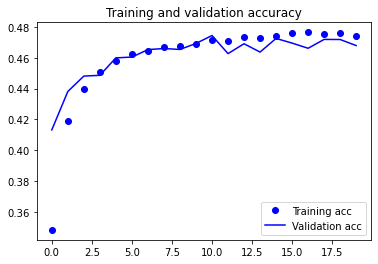

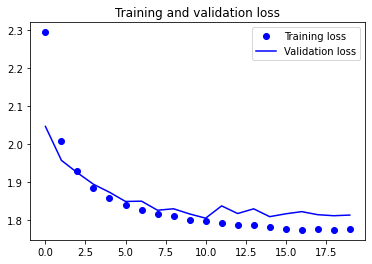

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Model 2 - LSTM Model 

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(64, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=20,
            validation_split = 0.2,
            )

model.save('part2_model2.h5')


# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 64)                30720     
                                                                 
 dense_28 (Dense)            (None, 55)                3575      
                                                                 
Total params: 34,295
Trainable params: 34,295
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 10s 8ms/step - loss: 2.1161 - accuracy: 0.3898 - val_loss: 1.8638 - val_accuracy: 0.4518
Epoch 2/20
941/941 [==============================] - 7s 8ms/step - loss: 1.7490 - accuracy: 0.4809 - val_loss: 1.6952 - val_accuracy: 0.4967
Epoch 3/20
941/941 [==============================] - 7s 7ms/step - loss: 1.6337 - accuracy: 0.5118 - val_loss: 1.6476 - val_accuracy: 0.5097
Epoch 4/20
941/941

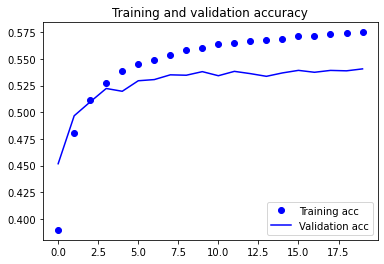

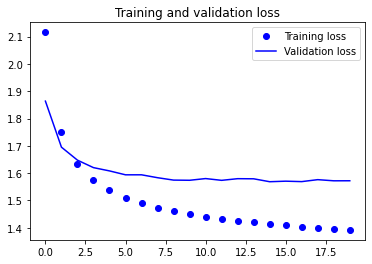

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Model 3 - GRU Model 


In [47]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.GRU(64, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=20,
            validation_split = 0.2,
            )

model.save('part2_model3.h5')

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                23232     
                                                                 
 dense_29 (Dense)            (None, 55)                3575      
                                                                 
Total params: 26,807
Trainable params: 26,807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 8s 7ms/step - loss: 2.0209 - accuracy: 0.4118 - val_loss: 1.7933 - val_accuracy: 0.4703
Epoch 2/20
941/941 [==============================] - 6s 6ms/step - loss: 1.7223 - accuracy: 0.4875 - val_loss: 1.7012 - val_accuracy: 0.4944
Epoch 3/20
941/941 [==============================] - 6s 7ms/step - loss: 1.6445 - accuracy: 0.5077 - val_loss: 1.6652 - val_accuracy: 0.5029
Epoch 4/20
941/941 

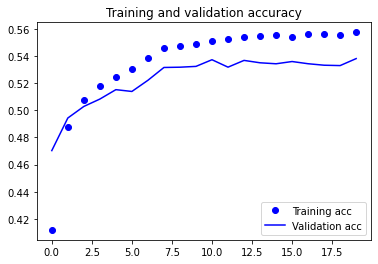

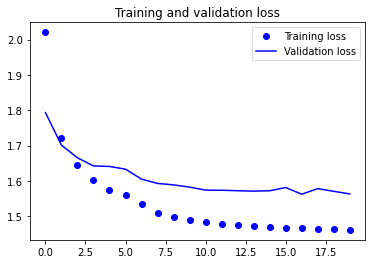

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Model 4 - Increasing Complexity of LSTM Model

Epochs increased to 30 to observe any changes in the performance over time.

In [24]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            30720     
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_6 (Dense)             (None, 55)                7095      
                                                                 
Total params: 136,631
Trainable params: 136,631
Non-trainable params: 0
_________________________________________________________________


In [25]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=30,
            validation_split = 0.2,
            )

model.save('part2_model4.h5')
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/30
941/941 [==============================] - 17s 15ms/step - loss: 2.0571 - accuracy: 0.4032 - val_loss: 1.7482 - val_accuracy: 0.4809
Epoch 2/30
941/941 [==============================] - 13s 14ms/step - loss: 1.6243 - accuracy: 0.5135 - val_loss: 1.6037 - val_accuracy: 0.5219
Epoch 3/30
941/941 [==============================] - 13s 14ms/step - loss: 1.5064 - accuracy: 0.5440 - val_loss: 1.5579 - val_accuracy: 0.5300
Epoch 4/30
941/941 [==============================] - 13s 14ms/step - loss: 1.4419 - accuracy: 0.5617 - val_loss: 1.5376 - val_accuracy: 0.5396
Epoch 5/30
941/941 [==============================] - 13s 14ms/step - loss: 1.3970 - accuracy: 0.5729 - val_loss: 1.5380 - val_accuracy: 0.5446
Epoch 6/30
941/941 [==============================] - 13s 14ms/step - loss: 1.3688 - accuracy: 0.5801 - val_loss: 1.5238 - val_accuracy: 0.5498
Epoch 7/30
941/941 [==============================] - 13s 14ms/step - loss: 1.3436 - accuracy: 0.5857 - val_loss: 1.5339 - val_accuracy:

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19228\1164193750.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


re was a 
mistake and the stranger, who 
wasper to be a beard of 
his life, he was a big mistake and the 
things 
he was 
glass, that 
harry heads to harry and ron and ron 
said 
he was saying he was the girling 
to see 
of the first was was a flash, and the 
sworling and the corridor and spent to stay 
and the strangers and the last 
























































------ temperature: 0.5
” 

“malfoy tricked you,” hermione said to harry. “you 
realized there and prophed gringotts?” 

“we only crossbles to coming — i know what was that 
head of wizard and straight indroped seaces, he took a mother marble 
letter 
was feet like a sirner, 
he’d looking his lesson quickly bell back 
here 
it realized the good of the 
classroom had 
straight 
firsting by 
a stars to be gryffindor, that’s all the stranger, the thie’s been cake and room, malfoy we


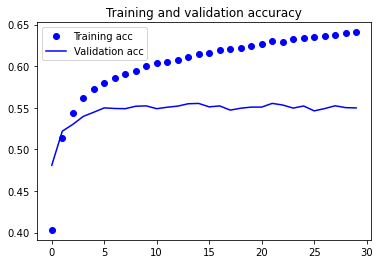

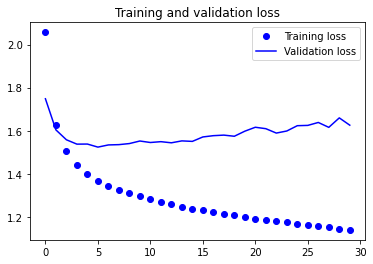

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 5 - Adding Dropout and More Layers for LSTM Model 

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(256, input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 64)            30720     
                                                                 
 lstm_5 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_6 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 55)                14135     
                                                                 
Total params: 537,911
Trainable params: 537,911
Non-trainable params: 0
_________________________________________________________________


In [28]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=30,
            validation_split = 0.2,
            )

model.save('part2_model5.h5')
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/30
941/941 [==============================] - 25s 22ms/step - loss: 2.4367 - accuracy: 0.3093 - val_loss: 1.9396 - val_accuracy: 0.4314
Epoch 2/30
941/941 [==============================] - 20s 21ms/step - loss: 1.8949 - accuracy: 0.4454 - val_loss: 1.7348 - val_accuracy: 0.4811
Epoch 3/30
941/941 [==============================] - 20s 21ms/step - loss: 2.0290 - accuracy: 0.4509 - val_loss: 1.8096 - val_accuracy: 0.4766
Epoch 4/30
941/941 [==============================] - 20s 21ms/step - loss: 1.8396 - accuracy: 0.4668 - val_loss: 1.6846 - val_accuracy: 0.5051
Epoch 5/30
941/941 [==============================] - 20s 21ms/step - loss: 1.7803 - accuracy: 0.4817 - val_loss: 1.7172 - val_accuracy: 0.4938
Epoch 6/30
941/941 [==============================] - 20s 21ms/step - loss: 1.7314 - accuracy: 0.4965 - val_loss: 1.6248 - val_accuracy: 0.5192
Epoch 7/30
941/941 [==============================] - 20s 21ms/step - loss: 1.6601 - accuracy: 0.5134 - val_loss: 1.6889 - val_accuracy:

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19228\634360056.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


y aano. 










“at thee aane 
and 
arn he the chey aanat thee er and che pashl t
itaing 










 they ats t 
poan e











er the n they he the tas the condy aen his hircte th 
ante mid. 


“rujoctalidl an ar 
they aang ther ther aen rank hare tde arner ar of lutate 
entan to aen the 
nreot hery aen the 
ar rofg song aen tu he the 
ar to t cons ofc ctheen eet the 
ante tdo hat
------ temperature: 0.5
he, 
thinking ... no, he was being stupid. potter wasn’t 
sue ps wats the n   said flanc  arn 
tarth eirn lept stol lew nlerg the tritoered caone, harn,”  staand 
enton nnron thoeait thee card the 
one lond. 
ho dacr aes and ceet it tido the it ti t poeroreop sneon coal and a to the wated harne ain l cure afd reind cont n to ber they wan b tadom tch ars ther it tids said hoo cpiar ctheest they wan with hut  e nn foe barwhe ceout a—’in toreoel ofdertone 
in


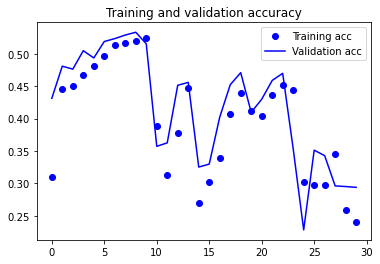

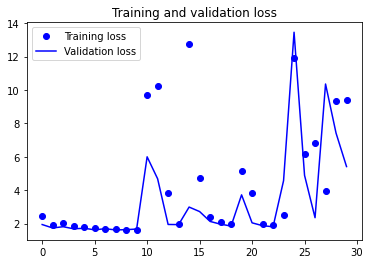

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Model 6 - Removing Dropout  and Adding Weight Regularization

Model has more fluctuation/noise and is more unstable, with a large spike in validation loss at around 10 epochs. 
Removing dropout here to find out if it will be any better.

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(256, input_shape=(maxlen, len(chars)), kernel_regularizer=regularizers.l2(l2=1e-4)))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 64)            30720     
                                                                 
 lstm_8 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_9 (LSTM)               (None, 256)               394240    
                                                                 
 dense_8 (Dense)             (None, 55)                14135     
                                                                 
Total params: 537,911
Trainable params: 537,911
Non-trainable params: 0
_________________________________________________________________


In [31]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=30,
            validation_split = 0.2,
            )
model.save('part2_model6.h5')

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/30
941/941 [==============================] - 25s 22ms/step - loss: 2.8500 - accuracy: 0.2211 - val_loss: 2.2275 - val_accuracy: 0.3622
Epoch 2/30
941/941 [==============================] - 20s 21ms/step - loss: 1.9868 - accuracy: 0.4306 - val_loss: 1.8618 - val_accuracy: 0.4688
Epoch 3/30
941/941 [==============================] - 20s 21ms/step - loss: 1.7790 - accuracy: 0.4904 - val_loss: 1.7422 - val_accuracy: 0.5007
Epoch 4/30
941/941 [==============================] - 20s 21ms/step - loss: 1.8063 - accuracy: 0.4902 - val_loss: 1.7454 - val_accuracy: 0.5156
Epoch 5/30
941/941 [==============================] - 20s 21ms/step - loss: 1.6422 - accuracy: 0.5322 - val_loss: 1.6754 - val_accuracy: 0.5232
Epoch 6/30
941/941 [==============================] - 20s 21ms/step - loss: 1.5766 - accuracy: 0.5486 - val_loss: 1.6299 - val_accuracy: 0.5393
Epoch 7/30
941/941 [==============================] - 20s 21ms/step - loss: 1.5377 - accuracy: 0.5589 - val_loss: 1.6123 - val_accuracy:

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19228\3156937464.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


rry and a parcharda 
be and the broom around a back a bit and the back 
but and the train and the back that the barrier and 
broom around a back a back that they was a back 
that the back that the brooms to back a ber arm 
------ temperature: 0.5
le wand. it so happens that the phoenix 
whose tail feather palcake to bath the barry and a 
carry was to back a was carcy that the barrily 
and the barry as the puring in that the rather 
broom at bask a front of the train and the walls 
and his broom and a pirgar timut to wand at the barriers 
broam timing the walk, and harry bakerd back that the 
back to them arm. “alirril and rou the profoss 
this back was a broomstick is the pather arb puicta 
albes a


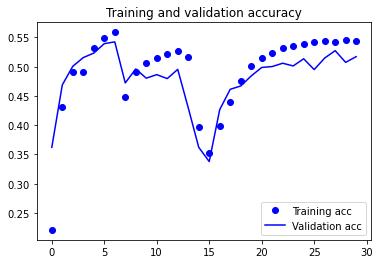

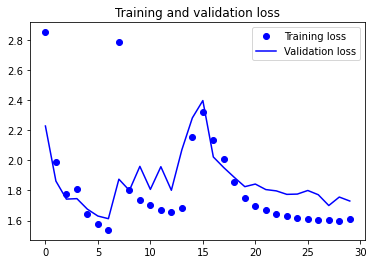

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 7 - Removed Weight Regularization

Without dropout, model becomes very unstable at around 20 epochs, validation accuracy goes down and loss goes up very fast. Removing weight regularization here to confirm if the instability is caused by the weight regularizer or the added layer. 

In [33]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(256, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 64)            30720     
                                                                 
 lstm_11 (LSTM)              (None, 60, 128)           98816     
                                                                 
 lstm_12 (LSTM)              (None, 256)               394240    
                                                                 
 dense_9 (Dense)             (None, 55)                14135     
                                                                 
Total params: 537,911
Trainable params: 537,911
Non-trainable params: 0
_________________________________________________________________


In [34]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=30,
            validation_split = 0.2,
            )

model.save('part2_model7.h5')

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/30
941/941 [==============================] - 25s 22ms/step - loss: 2.5580 - accuracy: 0.2826 - val_loss: 1.9971 - val_accuracy: 0.4197
Epoch 2/30
941/941 [==============================] - 20s 21ms/step - loss: 1.8470 - accuracy: 0.4538 - val_loss: 1.7502 - val_accuracy: 0.4818
Epoch 3/30
941/941 [==============================] - 20s 21ms/step - loss: 1.7192 - accuracy: 0.5001 - val_loss: 1.6216 - val_accuracy: 0.5173
Epoch 4/30
941/941 [==============================] - 20s 21ms/step - loss: 1.5630 - accuracy: 0.5301 - val_loss: 1.5996 - val_accuracy: 0.5342
Epoch 5/30
941/941 [==============================] - 19s 21ms/step - loss: 1.4926 - accuracy: 0.5499 - val_loss: 1.5741 - val_accuracy: 0.5329
Epoch 6/30
941/941 [==============================] - 20s 21ms/step - loss: 1.4554 - accuracy: 0.5611 - val_loss: 1.5472 - val_accuracy: 0.5403
Epoch 7/30
941/941 [==============================] - 20s 21ms/step - loss: 1.4312 - accuracy: 0.5670 - val_loss: 1.5641 - val_accuracy:

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19228\1144461042.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


 tel th thel ll le the he hire jell irl hit arel tel lr h heet ar he the he he thithe the th thit thit he he he hilt tarl tal th he that theldle tarit le te thel rel rell t hel th harl the lil the the thel hel th the the harl he ther thill rl thr t h he hel le arl th thald he hal le th her tel helr l hit hel hel th harl he thell t her the hal thr he thell r harilt le the hal athe ter la th t
------ temperature: 0.5
. “students, are you? and 
do you learn much, up at the schohe thefred tarir t thld ade tarl aal. sit pirl hh parit hall red tllil theln hed hh thal te tharl at thlrl wed pharrilr t llan het theldll il her hel thlinl, le 
cite tit jein thalt he ar ase jall ted thelr ll th hilt th he sah leeh tle lacl th hariprecp all re al h al rrlll t lel  haldilll chlas het lir lelld lelsrh jeillil it ial nal helrrll le ll th thiry thit ael h thili re rer ind harre in le


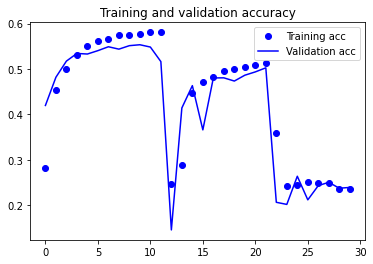

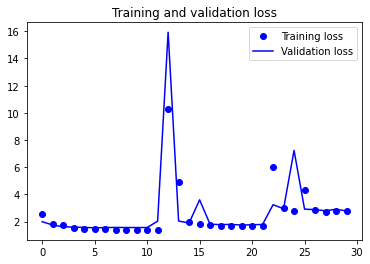

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 8 - Removing 1 LSTM Layer, Increased Nodes in Remaining LSTM Layers

Model was fluctuating due to too many layers, suspect that it was hard for the model to perform recurrent functions as there were too many layers to go through. Overfitting measures actually helped with stabilizing the model, so they will be added later on to compare each measure's effectiveness.

Increased complexity in the layers to compensate for the missing layer, also increased epochs to 40 to better observe changes in the model.

In [65]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(256, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 60, 128)           94208     
                                                                 
 lstm_59 (LSTM)              (None, 256)               394240    
                                                                 
 dense_37 (Dense)            (None, 55)                14135     
                                                                 
Total params: 502,583
Trainable params: 502,583
Non-trainable params: 0
_________________________________________________________________


In [66]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=40,
            validation_split = 0.2,
            )
model.save('part2_model8.h5')

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/40
941/941 [==============================] - 21s 17ms/step - loss: 2.1656 - accuracy: 0.3773 - val_loss: 1.7064 - val_accuracy: 0.4895
Epoch 2/40
941/941 [==============================] - 15s 16ms/step - loss: 1.5983 - accuracy: 0.5192 - val_loss: 1.5684 - val_accuracy: 0.5259
Epoch 3/40
941/941 [==============================] - 15s 15ms/step - loss: 1.4629 - accuracy: 0.5558 - val_loss: 1.5233 - val_accuracy: 0.5451
Epoch 4/40
941/941 [==============================] - 14s 15ms/step - loss: 1.3903 - accuracy: 0.5723 - val_loss: 1.5201 - val_accuracy: 0.5446
Epoch 5/40
941/941 [==============================] - 15s 15ms/step - loss: 1.3381 - accuracy: 0.5880 - val_loss: 1.5070 - val_accuracy: 0.5570
Epoch 6/40
941/941 [==============================] - 15s 15ms/step - loss: 1.3027 - accuracy: 0.5989 - val_loss: 1.5249 - val_accuracy: 0.5601
Epoch 7/40
941/941 [==============================] - 15s 16ms/step - loss: 1.2723 - accuracy: 0.6089 - val_loss: 1.5144 - val_accuracy:

C:\Users\Ryan\AppData\Local\Temp\ipykernel_22268\924895999.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


t ttt  tt ae 
   t y ta t ttt   
t  gb   t  .   wt t t t t tt tr t   rt  sme  
  d  t     hd   t d     s t t   t?t t t -  t t  t?tt t  t   tt  ttt   t t  t     t   
 t tttftte e t   
 ttt e   ttht  ttt  h ttt     ttte t     a t  
t“ t  tt  a t  
 e  t t te  tt ttw tt t m  t  he 
  t t  t tt ttd t t—  
  
m ’tt tete
t t tet   t t ntttt te   t   t  
     mtt t a)t ar ta y t t   t a t tm   tt
------ temperature: 0.5
eeting in secret all over the country 
were holding up their  tm,t   -er  gu tvwai  
  t m btmt  t  t ta e t”th etma h  “a       
r mwj tt  oe t

ter  h  
 r
tya h redtl  rty t  dae t   dam t h e  t ne a 

tt aeym ett  tat    t  ha t t htr ts htt”t hv  ir tta 
acou .m y  he   d eht   
. t t an td rt tideds m 
e   m hte  ap t b a.t e    m
e tad fee   teet ti  te   hat dn  i  b   mt’tb  dew. d sty bt   meg 
 ta tys  tt c  tee 
a te htu w

medhwry  t mh tit a


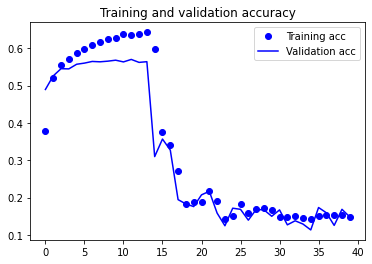

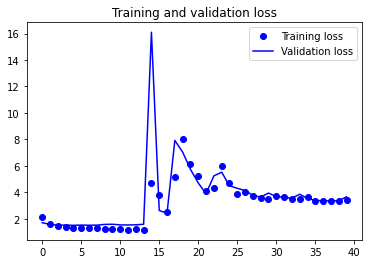

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 9 - Increased Complexity of Model

Will try to get the model to reach its highest accuracy through the complexity. Epochs reduced to 20 to stop overfitting/vanishing gradient.

In [42]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(256, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(512, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 60, 256)           319488    
                                                                 
 lstm_20 (LSTM)              (None, 512)               1574912   
                                                                 
 dense_13 (Dense)            (None, 55)                28215     
                                                                 
Total params: 1,922,615
Trainable params: 1,922,615
Non-trainable params: 0
_________________________________________________________________


In [43]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=20,
            validation_split = 0.2,
            )

model.save('part2_model9.h5')

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/20
941/941 [==============================] - 23s 20ms/step - loss: 2.3466 - accuracy: 0.3362 - val_loss: 1.7505 - val_accuracy: 0.4804
Epoch 2/20
941/941 [==============================] - 18s 19ms/step - loss: 1.6484 - accuracy: 0.5065 - val_loss: 1.6927 - val_accuracy: 0.5176
Epoch 3/20
941/941 [==============================] - 17s 19ms/step - loss: 1.7047 - accuracy: 0.5141 - val_loss: 1.5687 - val_accuracy: 0.5376
Epoch 4/20
941/941 [==============================] - 17s 18ms/step - loss: 1.5789 - accuracy: 0.5439 - val_loss: 1.5326 - val_accuracy: 0.5402
Epoch 5/20
941/941 [==============================] - 17s 18ms/step - loss: 1.4183 - accuracy: 0.5699 - val_loss: 1.5606 - val_accuracy: 0.5453
Epoch 6/20
941/941 [==============================] - 17s 18ms/step - loss: 1.3974 - accuracy: 0.5745 - val_loss: 1.5557 - val_accuracy: 0.5405
Epoch 7/20
941/941 [==============================] - 17s 18ms/step - loss: 1.3707 - accuracy: 0.5839 - val_loss: 1.6620 - val_accuracy:

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19228\873542666.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


“i hone were you the sorted of the you thought the 
on the 
on the 
on the 
on the 
onam, and 
slytherin and he was nothing the 
one of the 
on the 
on the 
on his hands of the 
onam and the 
other the street the dursleys were the you was the 
on the troll’ and 
sleame and 
the 
sharl a few 
. . . ... harry went. the 
on the 
on the troll’s and 
sleamed and seportle and slytherin and the stre
------ temperature: 0.5
 the castle, until they reached a kind of 
underground harbor. 

“i thit was off his eye. 
and the letter in the front and 
a row you of the year more and the starl and 







her burble. 

“don’t know thes they were you of the trought, what, now,” said the book, harry and hermione and ron and her 
professor fhit mcgonagall. 

“i han 
the you were you the ghostty that’s a best 
anything, harry was not anything 
so you think he had to the after, which it w


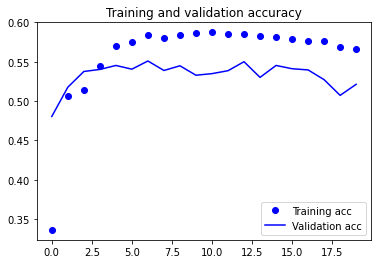

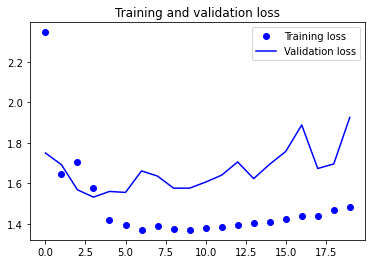

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 10 - Reduced Complexity of Model 9

Model 9 was too complex, there was lots of fluctuation in the graph. Hence, the number of parameters in Model 9 will be reduced by around 900,000, but will still be higher than Model 8 to try and get a better accuracy.

In [68]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(192, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(384, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 60, 192)           190464    
                                                                 
 lstm_61 (LSTM)              (None, 384)               886272    
                                                                 
 dense_38 (Dense)            (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________


In [69]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=20,
            validation_split = 0.2,
            )

model.save('part2_model10.h5')

Epoch 1/20
941/941 [==============================] - 20s 17ms/step - loss: 2.3880 - accuracy: 0.3294 - val_loss: 1.7649 - val_accuracy: 0.4700
Epoch 2/20
941/941 [==============================] - 17s 18ms/step - loss: 1.6859 - accuracy: 0.5065 - val_loss: 1.5837 - val_accuracy: 0.5235
Epoch 3/20
941/941 [==============================] - 16s 17ms/step - loss: 1.4838 - accuracy: 0.5522 - val_loss: 1.5138 - val_accuracy: 0.5489
Epoch 4/20
941/941 [==============================] - 16s 17ms/step - loss: 1.4128 - accuracy: 0.5726 - val_loss: 1.5186 - val_accuracy: 0.5513
Epoch 5/20
941/941 [==============================] - 17s 18ms/step - loss: 1.3663 - accuracy: 0.5859 - val_loss: 1.5240 - val_accuracy: 0.5580
Epoch 6/20
941/941 [==============================] - 15s 16ms/step - loss: 1.3345 - accuracy: 0.5933 - val_loss: 1.5080 - val_accuracy: 0.5597
Epoch 7/20
941/941 [==============================] - 15s 16ms/step - loss: 1.3122 - accuracy: 0.6016 - val_loss: 1.5054 - val_accuracy:

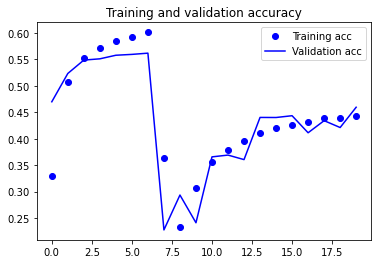

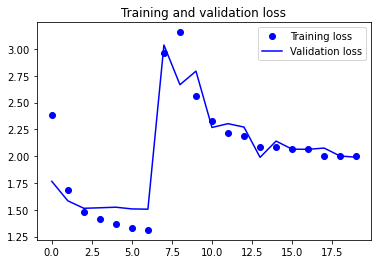

--- Generating with seed: " 
you will know.” 

and harry knew it would be no good to ar"
------ temperature: 0.2
 
you will know.” 

and harry knew it would be no good to arm the 

C:\Users\Ryan\AppData\Local\Temp\ipykernel_22268\2374233668.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


trorr the trast the strast the trast the to to the strarrres the troor the trot the trast the strarrast the stroom the to the room the strast to the stratter the strast the to the to the strat to the to the strat the strarror the trast the tar the to the strast the room the strast the stratter the trot the strast the strat to the strast the strast the trot the trist the room the strast the s
------ temperature: 0.5
 
you will know.” 

and harry knew it would be no good to arly. through the strast to the to strast — the storch to the storir that to corrir the sproors that the through the crast — through to got starss — around to sroomstarrr the strass the stratsers the sar the ton the torrer the strast the trirrs harry the stest the marring the stratter the ttant of through the crost stras to stror through the to the corrir stors the tromp tried to the room the starre


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

### Model 11 - Adam Optimizer

RMSProp optimizer changed to Adam.

In [71]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(192, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(384, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 60, 192)           190464    
                                                                 
 lstm_63 (LSTM)              (None, 384)               886272    
                                                                 
 dense_39 (Dense)            (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________


In [72]:
optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=128,
            epochs=20,
            validation_split = 0.2,
            )

model.save('part2_model11.h5')

Epoch 1/20
941/941 [==============================] - 20s 18ms/step - loss: 2.3174 - accuracy: 0.3345 - val_loss: 1.9148 - val_accuracy: 0.4375
Epoch 2/20
941/941 [==============================] - 19s 20ms/step - loss: 1.7557 - accuracy: 0.4739 - val_loss: 1.6760 - val_accuracy: 0.5001
Epoch 3/20
941/941 [==============================] - 19s 21ms/step - loss: 1.5735 - accuracy: 0.5208 - val_loss: 1.5612 - val_accuracy: 0.5259
Epoch 4/20
941/941 [==============================] - 20s 21ms/step - loss: 1.4726 - accuracy: 0.5475 - val_loss: 1.5141 - val_accuracy: 0.5409
Epoch 5/20
941/941 [==============================] - 20s 21ms/step - loss: 1.4038 - accuracy: 0.5652 - val_loss: 1.5102 - val_accuracy: 0.5459
Epoch 6/20
941/941 [==============================] - 20s 21ms/step - loss: 1.3514 - accuracy: 0.5782 - val_loss: 1.4934 - val_accuracy: 0.5529
Epoch 7/20
941/941 [==============================] - 20s 21ms/step - loss: 1.3122 - accuracy: 0.5896 - val_loss: 1.4816 - val_accuracy:

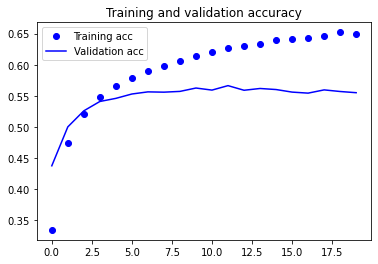

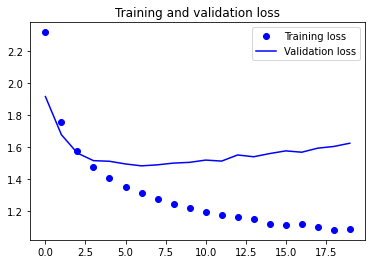

------ temperature: 0.2
k something over?” 

“you sound like hermione.” 

“i’m serious?” 

“the country. 

“that’s a sh

C:\Users\Ryan\AppData\Local\Temp\ipykernel_22268\3906953711.py:8: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


uff and the country. 

“that’s the 
cast to see 
professor mcgonagall seemed to go and her head. 

“that’s the 
way of the corridor carched and the corridor of the corridor of the corridor of the corridor! while if he caught a 
snape, and the corridor! they can’t be a step, harry saw the 
wizard and the corridor of the corridor of the corridor of the cart and the
------ temperature: 0.5
k something over?” 

“you sound like hermione.” 

“i’m seriours and so before a step, and the stare, 
and 
something to him, and he could hund of the stool on the cart of the cauntrance was leaned straight in his neared and said. “you to kill, 
him in the gards and 
something the short in the food again, 
but i’ve got about the wall and came in the cold walk at harry’s. 

“and his 
turning. he asked into a sorting on the first years 
were ally 
to the trol


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

### Hyperparameter Tests 

The goal of these tests is to see and compare which optimizer would give the best results, as from the graphs of Models 9 to 11 shown earlier, the results are very similar and are very hard to observe without a proper comparision. The hyperparameter tests will use the network from Model 10 and train each model with different hyperparameter values.

Since many different models will be trained, the text generation will not be used in every single one of these models, as it is much faster and more reliable to look at the accuracy and loss values instead of a lot of somewhat coherent text. 

After all the tests have been concluded, the initial model (Model 10) will be compared against the final, improved model using both accuracy and its text generations.

### Defining Functions

In [25]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#---------------------------------------------------------------------
#Function to create the default configuration for the model. This will be overridden as 
#required during experimentation
#---------------------------------------------------------------------
def base_model_config():
    model_config = {
            "HIDDEN_NODES" : [192,384],
            "OUTPUT_NODES" : 55,
            "OUTPUT_ACTIVATION" : "softmax",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.01,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 20,
            "BATCH_SIZE" : 128,
            "VALIDATION_SPLIT" : 0.2,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "REGULARIZER_RATE" : 0.001,
            "METRICS" : ["accuracy"],
            "RECURRENT_DROPOUT" : 0.0,
            "HIDDEN_ACTIVATION" : 'tanh',
            "RECURRENT_ACTIVATION": 'sigmoid'
            }
    return model_config


#---------------------------------------------------------------------
# Function to create an optimizer based on the optimizer name and learning rate
#---------------------------------------------------------------------
def get_optimizer(optimizer_name, learning_rate):
    #'sgd','rmsprop','adam','adagrad'
    optimizer=None
    
    if optimizer_name == 'adagrad': 
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)

    elif 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    elif'adam' :
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        
    else :
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
            
    return optimizer
    
#---------------------------------------------------------------------
# Function to create a model and fit the model
#---------------------------------------------------------------------

def create_and_run_model(model_config,X,Y,model_name) :
    
    model=tf.keras.models.Sequential(name=model_name)
    
    for layer in range(len(model_config["HIDDEN_NODES"])):
        
        if (layer == 0):
            model.add(
                    keras.layers.LSTM(model_config["HIDDEN_NODES"][layer],
                    return_sequences = True,
                    input_shape=(maxlen, len(chars)),
                    name="LSTM-Layer-" + str(layer),
                    recurrent_dropout = model_config["RECURRENT_DROPOUT"],
#                     kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
#                     bias_initializer = model_config["BIAS_INITIALIZER"],
#                     kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"],
                    recurrent_activation = model_config["RECURRENT_ACTIVATION"]
            ))
                    
        else:
            
            if ( model_config["NORMALIZATION"] == "batch"):
                model.add(keras.layers.BatchNormalization())
                

                
            model.add(
                    keras.layers.LSTM(model_config["HIDDEN_NODES"][layer],
                    name="LSTM-Layer-" + str(layer),
                    recurrent_dropout = model_config["RECURRENT_DROPOUT"],
#                     kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
#                     bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"],
                    recurrent_activation = model_config["RECURRENT_ACTIVATION"]
            )) 
            

    if ( model_config["DROPOUT_RATE"] > 0.0 ):
        model.add(keras.layers.Dropout(model_config["DROPOUT_RATE"]))  
    
    model.add(keras.layers.Dense(model_config["OUTPUT_NODES"],
                    name="Output-Layer",
                    activation=model_config["OUTPUT_ACTIVATION"]))
    
    optimizer = get_optimizer( model_config["OPTIMIZER"],
                              model_config["LEARNING_RATE"])
    
    model.compile(loss=model_config["LOSS_FUNCTION"],
                  optimizer=optimizer,
                   metrics=model_config["METRICS"])
    
    print("\n******************************************************")
    model.summary()
    
#     X_train, X_val, Y_train, Y_val =train_test_split(
#                         X,Y,
#                         stratify=Y,
#                         test_size=model_config["VALIDATION_SPLIT"]) 
    
    history=model.fit(x,y,
          batch_size=model_config["BATCH_SIZE"],
          epochs=model_config["EPOCHS"],
          validation_split = 0.2)
    
    return history

#---------------------------------------------------------------------
#Function to plot a graph based on the results derived
#---------------------------------------------------------------------

def plot_graph(accuracy_measures, title):
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment], 
                 label=experiment,
                    linewidth=3)
        
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()
    

###  Optimizer Test

Optimizers: RMSProp, SGD, Adam, Adagrad

In [5]:
accuracy_measures = {}
loss_measures = {}

optimizer_list = ['rmsprop','sgd','adam','adagrad']

for optimizer in optimizer_list:
    
    model_config = base_model_config()
    
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    optimizer_history=create_and_run_model(model_config,x,y, model_name)
    
    accuracy_measures[model_name] = optimizer_history.history["val_accuracy"]
    loss_measures[model_name] = optimizer_history.history["val_loss"]


******************************************************
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 22s 18ms/step - loss: 2.5609 - accuracy: 0.2999 - val_loss: 2.0957 - val_accuracy: 0.4333
Epoch 2/20
941/941 [==============================] - 17s 18ms/step - loss: 1.6960 - accuracy: 0.4971 -

Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 20s 18ms/step - loss: 2.4057 - accuracy: 0.3201 - val_loss: 1.9096 - val_accuracy: 0.4456
Epoch 2/20
941/941 [==============================] - 16s 17ms/step - loss: 1.9696 - accuracy: 0.4620 - val_loss: 1.6657 - val_accuracy: 0.5088
Epoch 3/20
941/941 [==============================] - 16s 17ms/step - loss: 1.5542 - accuracy: 0.5343 - val_loss: 1.5698 - val_accuracy: 0.5381
Epoch 4/20
941/941 [==============================] - 16s 17ms/step - loss: 1.4584 - accuracy: 0.5599 - val_loss: 1.5460 - val_accuracy: 0.5451
Epoch 5/20
941/941 [==============================] - 16s 17ms/step - loss: 1.4045 - accuracy: 0.5740 - val_loss: 1.5467 - val_accuracy: 0.5569
Epoch 6/20
941/941 [==============================] - 16s 17ms/step - loss: 1.3726 - accuracy: 0.5827 - val_loss: 1.4989 - val_accuracy: 0

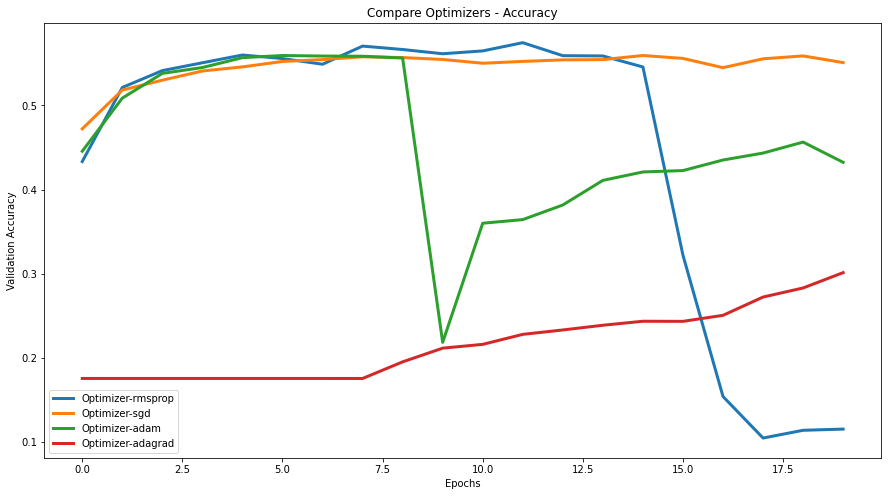

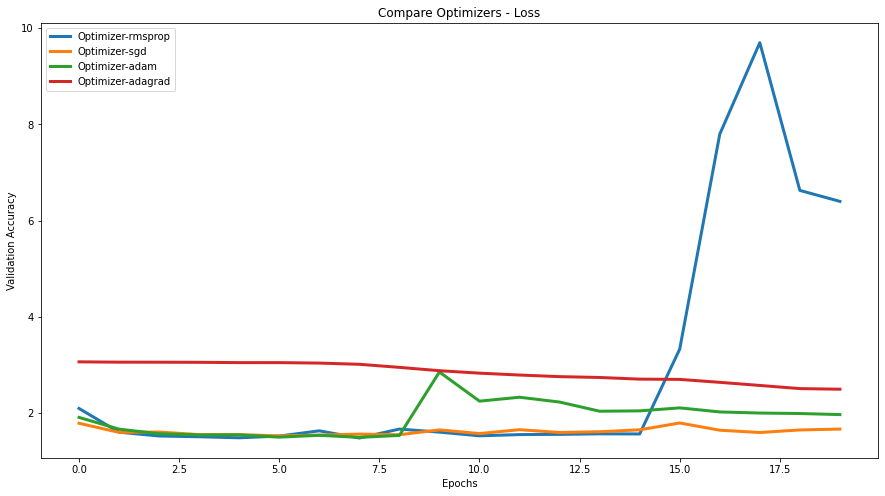

In [6]:
plot_graph(accuracy_measures, "Compare Optimizers - Accuracy")
plot_graph(loss_measures, "Compare Optimizers - Loss")

### Dropout Values Test 

Dropout Values: 0 to 0.5

In [92]:
dropout_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
accuracy_measures = {}
loss_measures = {}

for value in dropout_list:
        model_config = base_model_config()
        model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
        model_config["DROPOUT_RATE"] = value
        model_name = "Dropout-" + str(value)
        dropout_history=create_and_run_model(model_config,x,y, model_name)

        accuracy_measures[model_name] = dropout_history.history["val_accuracy"]
        loss_measures[model_name] = dropout_history.history["val_loss"]


******************************************************
Model: "Dropout-0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 20s 19ms/step - loss: 2.3222 - accuracy: 0.3457 - val_loss: 1.7759 - val_accuracy: 0.4715
Epoch 2/20
941/941 [==============================] - 17s 18ms/step - loss: 1.6348 - accuracy: 0.5086 - val_los

 dropout_8 (Dropout)         (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 20s 19ms/step - loss: 2.2274 - accuracy: 0.3643 - val_loss: 1.7342 - val_accuracy: 0.4839
Epoch 2/20
941/941 [==============================] - 17s 18ms/step - loss: 1.6906 - accuracy: 0.5060 - val_loss: 1.5923 - val_accuracy: 0.5284
Epoch 3/20
941/941 [==============================] - 17s 18ms/step - loss: 1.5448 - accuracy: 0.5392 - val_loss: 1.5570 - val_accuracy: 0.5424
Epoch 4/20
941/941 [==============================] - 17s 18ms/step - loss: 1.4758 - accuracy: 0.5579 - val_loss: 1.5005 - val_accuracy: 0.5576
Epoch 5/20
941/941

Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 20s 18ms/step - loss: 2.7358 - accuracy: 0.2657 - val_loss: 2.2024 - val_accuracy: 0.3722
Epoch 2/20
941/941 [==============================] - 17s 18ms/step - loss: 1.9820 - accuracy: 0.4213 - val_loss: 1.7765 - val_accuracy: 0.4732
Epoch 3/20
941/941 [==============================] - 17s 18ms/step - loss: 1.7898 - accuracy: 0.4752 - val_loss: 1.7022 - val_accuracy: 0.4962
Epoch 4/20
941/941 [==============================] - 17s 18ms/step - loss: 1.7241 - accuracy: 0.4944 - val_loss: 1.6620 - val_accuracy: 0.5209
Epoch 5/20
941/941 [==============================] - 17s 18ms/step - loss: 1.6864 - accuracy: 0.5050 - val_loss: 1.6243 - val_accuracy: 0.5186
Epoch 6/20
941/941 [==============================] - 17s 18ms/step - loss: 1.6644 - accuracy: 0.5124 - val_loss: 1.6159 - val_accuracy: 0.5240
Epoch 7/20
941/941 [==========================

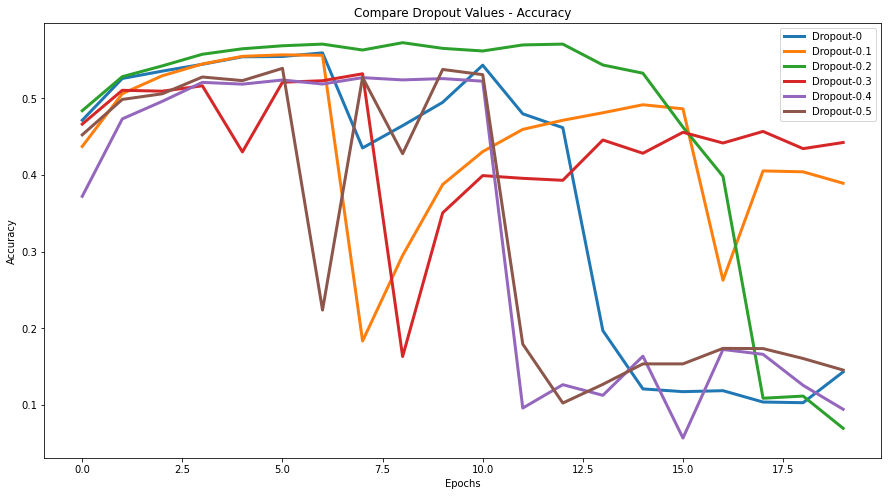

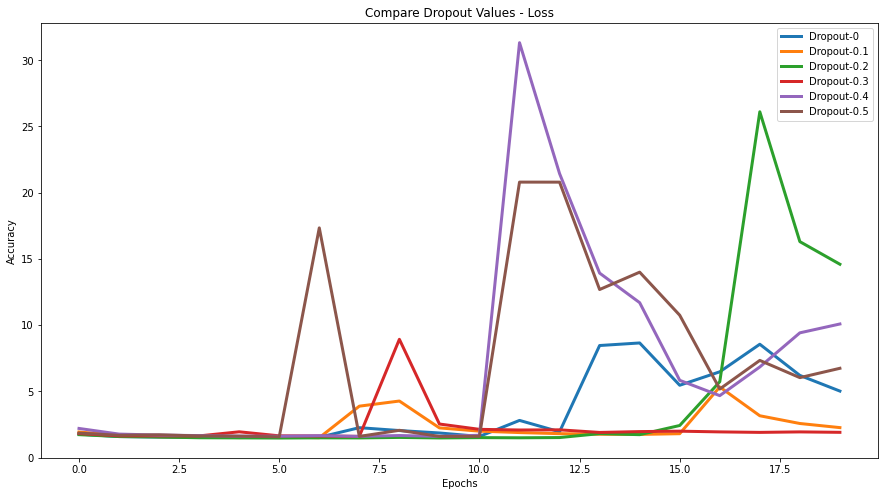

In [93]:
plot_graph(accuracy_measures, "Compare Dropout Values - Accuracy")
plot_graph(loss_measures, "Compare Dropout Values - Loss")

### Weight Regularization Test 

Weight Regularizers: L1, L2, L1 and L2

Default Value: 0.01

In [63]:
from tensorflow.keras import regularizers

regularizer_list = ['l1','l2','l1_l2']
accuracy_measures = {}
loss_measures = {}

model_config = base_model_config()
model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model_config["DROPOUT_RATE"] = 0.2
model_name = "Regularization-None"
regularizer_history=create_and_run_model(model_config,x,y, model_name)

accuracy_measures[model_name] = regularizer_history.history["val_accuracy"]
loss_measures[model_name] = regularizer_history.history["val_loss"]

for regularizer in regularizer_list:
    
    model_config = base_model_config()
    model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
    model_config["DROPOUT_RATE"] = 0.2
    model_config["REGULARIZER"] = regularizer
    model_name = "Regularization-" + regularizer
    regularizer_history=create_and_run_model(model_config,x,y, model_name)

    accuracy_measures[model_name] = regularizer_history.history["val_accuracy"]
    loss_measures[model_name] = regularizer_history.history["val_loss"]


******************************************************
Model: "Regularization-None"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_24 (Dropout)        (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 18s 16ms/step - loss: 2.1785 - accuracy: 0.3767 - val_loss:

                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_26 (Dropout)        (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
941/941 [==============================] - 19s 17ms/step - loss: 2.9949 - accuracy: 0.2269 - val_loss: 2.5453 - val_accuracy: 0.3182
Epoch 2/20
941/941 [==============================] - 15s 16ms/step - loss: 2.6283 - accuracy: 0.3495 - val_loss: 6.0100 - val_accuracy: 0.3890
Epoch 3/20
941/941 [==============================] - 15s 16ms/step - loss: 2.8210 - accuracy: 0.3902 - val_

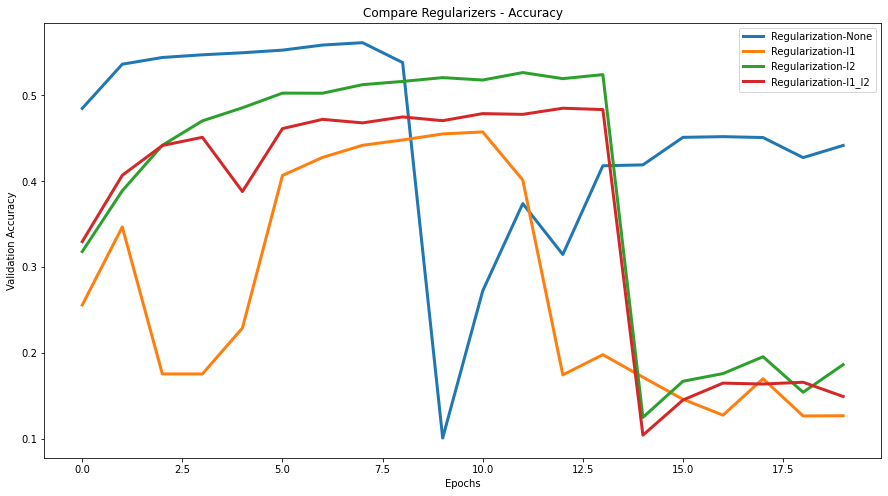

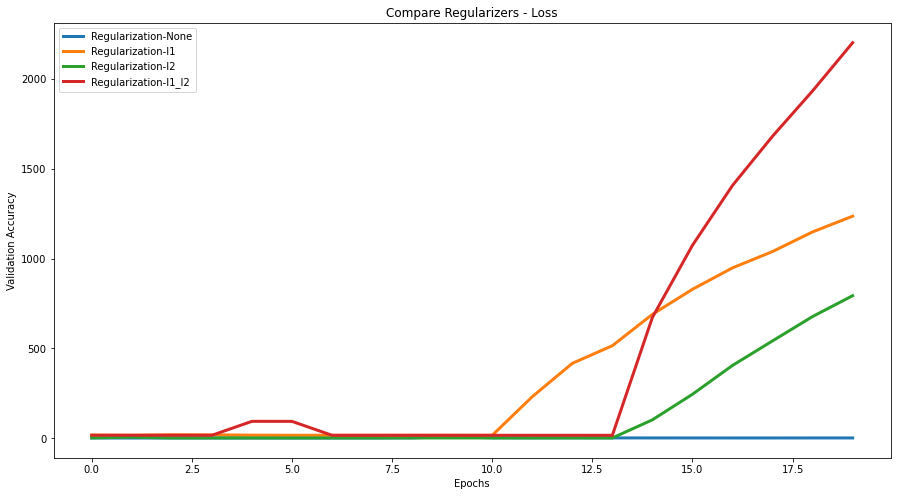

In [64]:
plot_graph(accuracy_measures, "Compare Regularizers - Accuracy")
plot_graph(loss_measures, "Compare Regularizers - Loss")

### Batch Size and Validation Split Test 

Epochs reduced to 10 to save time, as it was shown in previous tests that 10 is enough to make a verdict on which change performs the best.

In [9]:
batch_list = [64, 128, 256, 512]
split_list = [0.2, 0.3, 0.4]

accuracy_measures = {}
loss_measures = {}


for batch_size in batch_list:
    for validation_split in split_list:
        model_config = base_model_config()
        model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
        model_config["DROPOUT_RATE"] = 0.2
        model_config["REGULARIZER"] = None
        model_config["EPOCHS"] = 10
        model_config["BATCH_SIZE"] = batch_size
        model_config["VALIDATION_SPLIT"] = validation_split 
        model_name = "BatchSize-" + str(batch_size) + "/ValidationSplit-" + str(validation_split)
        bv_history=create_and_run_model(model_config,x,y, model_name)

        accuracy_measures[model_name] = bv_history.history["val_accuracy"]
        loss_measures[model_name] = bv_history.history["val_loss"]


******************************************************
Model: "BatchSize-64/ValidationSplit-0.2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1882/1882 [==============================] - 30s 15ms/step - loss: 2.2582 - accuracy: 0.3

                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
941/941 [==============================] - 19s 17ms/step - loss: 3.1657 - accuracy: 0.2404 - val_loss: 2.5400 - val_accuracy: 0.2789
Epoch 2/10
941/941 [==============================] - 15s 16ms/step - loss: 1.7445 - accuracy: 0.4853 - val_loss: 1.6224 - val_accuracy: 0.5139
Epoch 3/10
941/941 [==============================] - 15s 16ms/step - loss: 1.5689 - accuracy: 0.5323 - val_loss: 1.5446 - val_accuracy: 0.5380
Epoch 4/10
941/941 [==============================] - 15s 16ms/step - loss: 1.4950 - accuracy: 0.5525 - val_loss: 1.5275 - val_accuracy: 0.5442
Epoch 5/10
941/941 [==============================] - 15s 16ms/step - loss: 1.4526 - accuracy: 0.5643 - val_loss: 1.5224 - val_accuracy: 0.5532
Epoch 6/10
941/941 [==============================] - 15s 16ms/step - lo

236/236 [==============================] - 7s 28ms/step - loss: 1.2507 - accuracy: 0.6073 - val_loss: 1.4904 - val_accuracy: 0.5662
Epoch 10/10
236/236 [==============================] - 7s 28ms/step - loss: 1.2130 - accuracy: 0.6195 - val_loss: 1.4964 - val_accuracy: 0.5626

******************************************************
Model: "BatchSize-512/ValidationSplit-0.3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_11 (Dropout)        (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                               

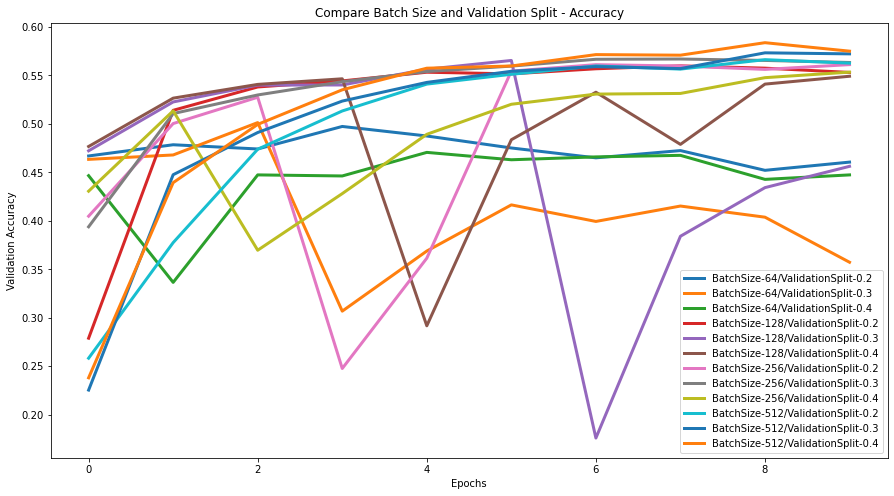

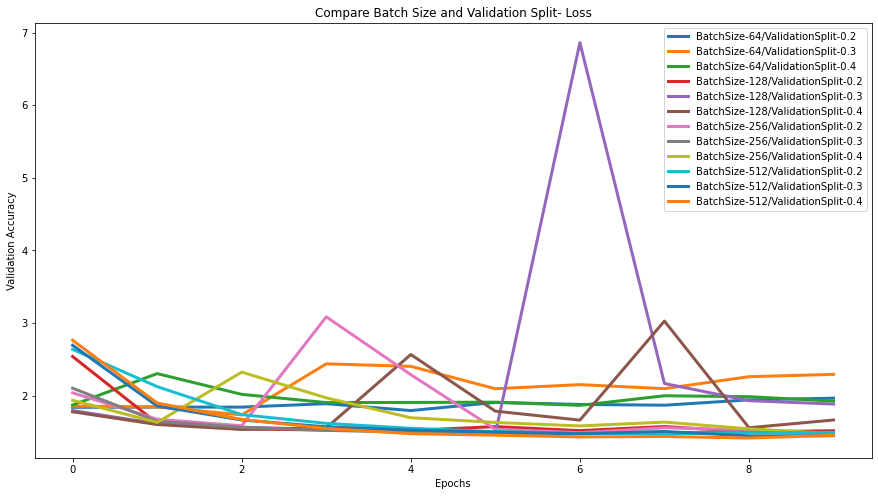

In [10]:
plot_graph(accuracy_measures, "Compare Batch Size and Validation Split - Accuracy")
plot_graph(loss_measures, "Compare Batch Size and Validation Split- Loss")

### Further Batch Size and Validation Testing 1

The larger batch size of 512 seems to outperform smaller batch sizes, not only in terms of accuracy but also training speed. Hence, larger batch sizes than 512 will be tested as well to see if improvements can still be made.

In [11]:
batch_list = [1024, 2048, 4096]
split_list = [0.2, 0.3, 0.4]

accuracy_measures = {}
loss_measures = {}

# Previous Model
model_config = base_model_config()
model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model_config["DROPOUT_RATE"] = 0.2
model_config["REGULARIZER"] = None
model_config["EPOCHS"] = 10
model_config["BATCH_SIZE"] = 512
model_config["VALIDATION_SPLIT"] = 0.4
model_name = "BatchSize-" + str(batch_size) + "/ValidationSplit-" + str(validation_split)
bv2_history=create_and_run_model(model_config,x,y, model_name)

accuracy_measures[model_name] = bv2_history.history["val_accuracy"]
loss_measures[model_name] = bv2_history.history["val_loss"]

for batch_size in batch_list:
    for validation_split in split_list:
        model_config = base_model_config()
        model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
        model_config["DROPOUT_RATE"] = 0.2
        model_config["REGULARIZER"] = None
        model_config["EPOCHS"] = 10
        model_config["BATCH_SIZE"] = batch_size
        model_config["VALIDATION_SPLIT"] = validation_split 
        model_name = "BatchSize-" + str(batch_size) + "/ValidationSplit-" + str(validation_split)
        bv2_history=create_and_run_model(model_config,x,y, model_name)

        accuracy_measures[model_name] = bv2_history.history["val_accuracy"]
        loss_measures[model_name] = bv2_history.history["val_loss"]


******************************************************
Model: "BatchSize-512/ValidationSplit-0.4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_13 (Dropout)        (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
236/236 [==============================] - 11s 32ms/step - loss: 2.8975 - accuracy: 0.20

Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 10s 56ms/step - loss: 3.1974 - accuracy: 0.1598 - val_loss: 3.1017 - val_accuracy: 0.1312
Epoch 2/10
118/118 [==============================] - 6s 49ms/step - loss: 2.8441 - accuracy: 0.2103 - val_loss: 2.5397 - val_accuracy: 0.2816
Epoch 3/10
118/118 [==============================] - 6s 51ms/step - loss: 2.1504 - accuracy: 0.3724 - val_loss: 1.8636 - val_accuracy: 0.4490
Epoch 4/10
118/118 [==============================] - 6s 50ms/step - loss: 1.7203 - accuracy: 0.4854 - val_loss: 1.6064 - val_accuracy: 0.5184
Epoch 5/10
118/118 [==============================] - 6s 51ms/step - loss: 1.5498 - accuracy: 0.5329 - val_loss: 1.5283 - val_accuracy: 0.5392
Epoch 6/10
118/118 [==============================] - 6s 50ms/step - loss: 1.4327 - accuracy: 0.5599 - val_loss: 1.4875 - val_accuracy: 0.5533

InternalError: Graph execution error:

Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 192, 384, 1, 60, 4096, 384] 
	 [[{{node CudnnRNN}}]]
	 [[BatchSize-4096/ValidationSplit-0.2/LSTM-Layer-1/PartitionedCall]] [Op:__inference_train_function_739394]

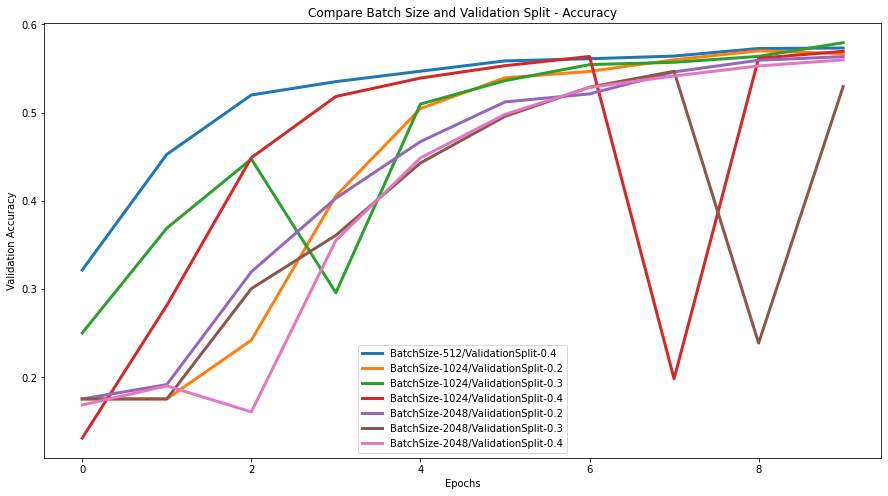

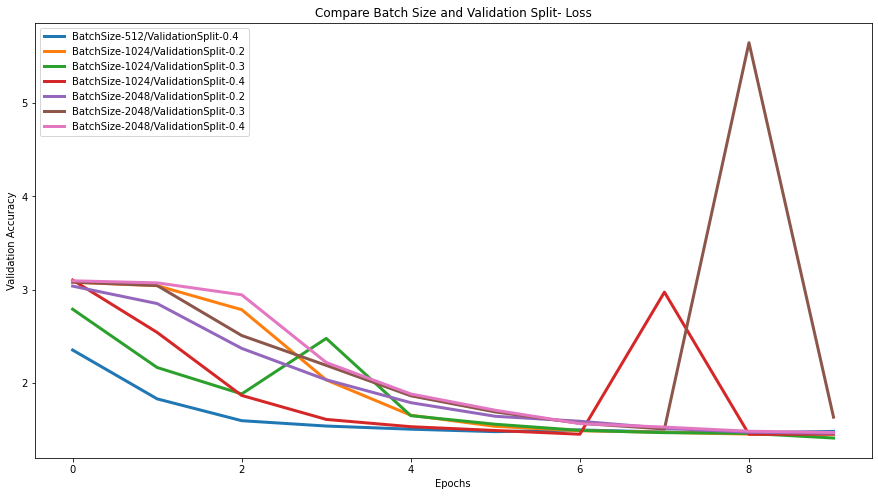

In [12]:
plot_graph(accuracy_measures, "Compare Batch Size and Validation Split - Accuracy")
plot_graph(loss_measures, "Compare Batch Size and Validation Split- Loss")

The model was not able to train with a batch size of 4096, so the model was trained only up to 2048 batch size.

### Further Batch Size and Validation Testing 2

At the end of the 10 epochs, the model with a Batch Size of 1024 and a Validation Split of 0.3 seemed to have a better accuracy than the model with a Batch Size of 512 and Validation Split of 0.4. These 2 models will be compared by testing them 3 times each to see if there is any change in the results.

In [9]:
accuracy_measures = {}
loss_measures = {}

for i in range (3):
    model_config = base_model_config()
    model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
    model_config["DROPOUT_RATE"] = 0.2
    model_config["REGULARIZER"] = None
    model_config["EPOCHS"] = 10
    model_config["BATCH_SIZE"] = 512
    model_config["VALIDATION_SPLIT"] = 0.4 
    model_name = "Model" + str(i+1) + "-" + str(512) + "/" + str(0.4)
    bv3_history=create_and_run_model(model_config,x,y, model_name)

    accuracy_measures[model_name] = bv3_history.history["val_accuracy"]
    loss_measures[model_name] = bv3_history.history["val_loss"]
    
for i in range (3):
    model_config = base_model_config()
    model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
    model_config["DROPOUT_RATE"] = 0.2
    model_config["REGULARIZER"] = None
    model_config["EPOCHS"] = 10
    model_config["BATCH_SIZE"] = 1024
    model_config["VALIDATION_SPLIT"] = 0.3
    model_name = "Model" + str(i+1) + "-" + str(1024) + "/" + str(0.3)
    bv3_history=create_and_run_model(model_config,x,y, model_name)

    accuracy_measures[model_name] = bv3_history.history["val_accuracy"]
    loss_measures[model_name] = bv3_history.history["val_loss"]


******************************************************
Model: "Model1-512/0.4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_3 (Dropout)         (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
236/236 [==============================] - 10s 31ms/step - loss: 2.9000 - accuracy: 0.2139 - val_loss: 2.45

Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 9s 56ms/step - loss: 3.1627 - accuracy: 0.1591 - val_loss: 3.2371 - val_accuracy: 0.1756
Epoch 2/10
118/118 [==============================] - 6s 49ms/step - loss: 2.5591 - accuracy: 0.2804 - val_loss: 2.1553 - val_accuracy: 0.3710
Epoch 3/10
118/118 [==============================] - 6s 49ms/step - loss: 1.9935 - accuracy: 0.4130 - val_loss: 1.8086 - val_accuracy: 0.4695
Epoch 4/10
118/118 [==============================] - 6s 49ms/step - loss: 1.7000 - accuracy: 0.4909 - val_loss: 1.6153 - val_accuracy: 0.5143
Epoch 5/10
118/118 [==============================] - 6s 49ms/step - loss: 2.6663 - accuracy: 0.3583 - val_loss: 2.3282 - val_accuracy: 0.3451
Epoch 6/10
118/118 [==============================] - 6s 50ms/step - loss: 2.0919 - accuracy: 0.4078 - val_loss: 1.7952 - val_accuracy: 0.4698


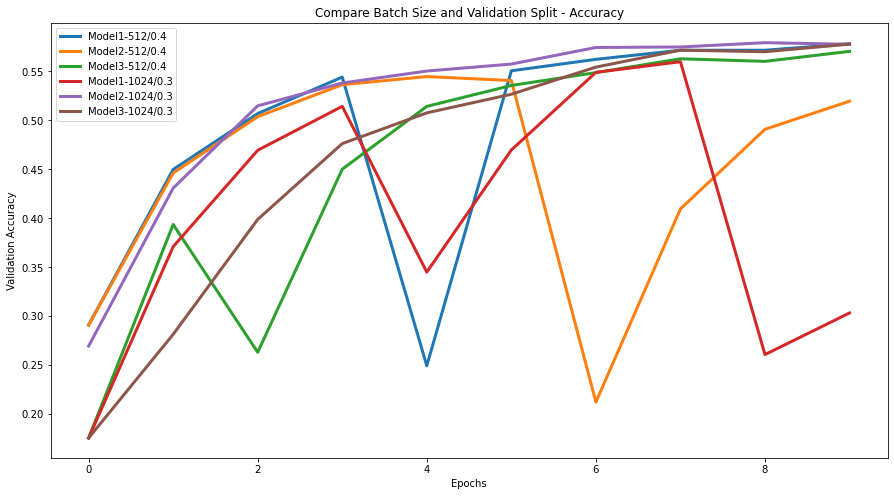

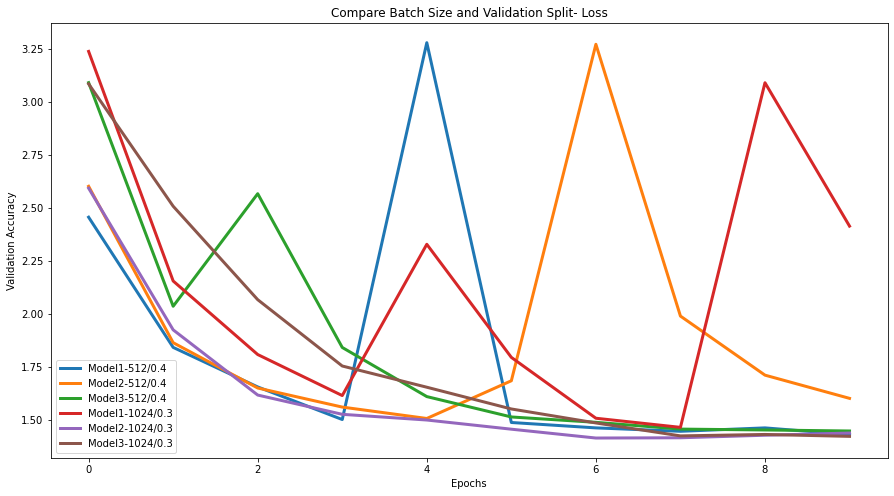

In [10]:
plot_graph(accuracy_measures, "Compare Batch Size and Validation Split - Accuracy")
plot_graph(loss_measures, "Compare Batch Size and Validation Split- Loss")

Looking at the validation accuracy of the models, we can see that at the end of the 10 epochs, 2 models with 1024 batch size managed to get a slightly higher accuracy than 2 other models with 512 batch size without overfitting. Generally, the validation loss seems to be more consistent as well, dropping gradually without any major spikes more often. Hence, 1024 batch size with 0.3 validation split will be used for the models.

###  Recurrent Dropout

In [9]:
accuracy_measures = {}
loss_measures = {}
    
model_config = base_model_config()
model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model_config["DROPOUT_RATE"] = 0.2
model_config["REGULARIZER"] = None
model_config["EPOCHS"] = 10
model_config["BATCH_SIZE"] = 1024
model_config["VALIDATION_SPLIT"] = 0.3
model_name = "Recurrent_Dropout-None"
recurrent_history=create_and_run_model(model_config,x,y, model_name)
accuracy_measures[model_name] = recurrent_history.history["val_accuracy"]
loss_measures[model_name] = recurrent_history.history["val_loss"]
    
recurrent_dropout_list = [0.1, 0.2, 0.3, 0.4]

for rd_value in recurrent_dropout_list:
    model_config = base_model_config()
    model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
    model_config["RECURRENT_DROPOUT"] = rd_value
    model_config["REGULARIZER"] = None
    model_config["EPOCHS"] = 10
    model_config["BATCH_SIZE"] = 1024
    model_config["VALIDATION_SPLIT"] = 0.3 
    model_name = "Recurrent_Dropout-" + str(rd_value)
    recurrent_history=create_and_run_model(model_config,x,y, model_name)

    accuracy_measures[model_name] = recurrent_history.history["val_accuracy"]
    loss_measures[model_name] = recurrent_history.history["val_loss"]


******************************************************
Model: "Recurrent_Dropout-None"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 10s 62ms/step - loss: 3.1617 - accuracy: 0.1622 - val_lo

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 52s 404ms/step - loss: 3.1678 - accuracy: 0.1671 - val_loss: 3.0719 - val_accuracy: 0.1751
Epoch 2/10
118/118 [==============================] - 48s 406ms/step - loss: 2.6996 - accuracy: 0.2522 - val_loss: 2.2605 - val_accuracy: 0.3546
Epoch 3/10
118/118 [====================

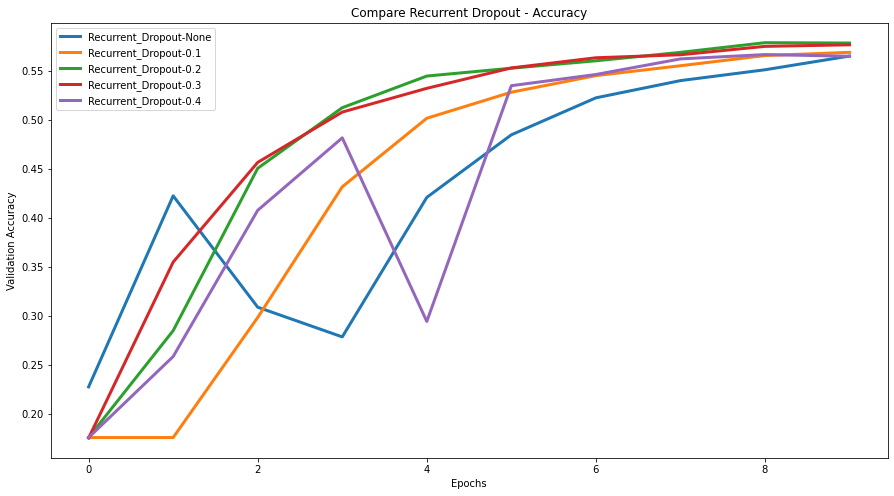

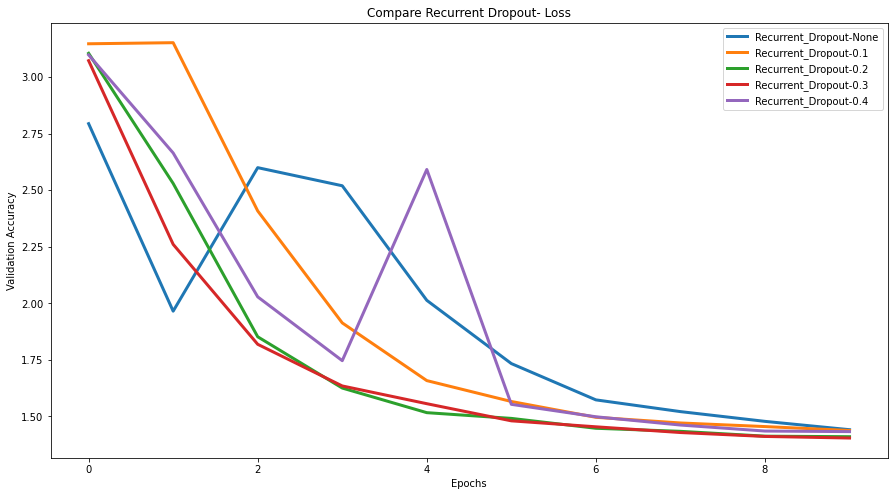

In [10]:
plot_graph(accuracy_measures, "Compare Recurrent Dropout - Accuracy")
plot_graph(loss_measures, "Compare Recurrent Dropout- Loss")

### Comparing Recurrent Dropout Against Both Dropouts 

In [6]:
accuracy_measures = {}
loss_measures = {}

# Current model with 0.2 recurrent dropout

model_config = base_model_config()
model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model_config["RECURRENT_DROPOUT"] = 0.2
model_config["REGULARIZER"] = None
model_config["EPOCHS"] = 10
model_config["BATCH_SIZE"] = 1024
model_config["VALIDATION_SPLIT"] = 0.3 
model_name = "Recurrent_Dropout-0.2"
recurrent_history2=create_and_run_model(model_config,x,y, model_name)

accuracy_measures[model_name] = recurrent_history2.history["val_accuracy"]
loss_measures[model_name] = recurrent_history2.history["val_loss"]

# Model with 0.2 dropout and 0.4 recurrent dropout

model_config = base_model_config()
model_config["OPTIMIZER"] = optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model_config["DROPOUT_RATE"] = 0.2
model_config["RECURRENT_DROPOUT"] = 0.2
model_config["REGULARIZER"] = None
model_config["EPOCHS"] = 10
model_config["BATCH_SIZE"] = 1024
model_config["VALIDATION_SPLIT"] = 0.3 
model_name = "Both_Dropouts-0.2"
recurrent_history2=create_and_run_model(model_config,x,y, model_name)

accuracy_measures[model_name] = recurrent_history2.history["val_accuracy"]
loss_measures[model_name] = recurrent_history2.history["val_loss"]


******************************************************
Model: "Recurrent_Dropout-0.2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-Layer-0 (LSTM)         (None, 60, 192)           190464    
                                                                 
 LSTM-Layer-1 (LSTM)         (None, 384)               886272    
                                                                 
 Output-Layer (Dense)        (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 51s 403ms/step - loss: 3.1562 - accuracy: 0.1620 - val_loss: 3.0040 - val_accuracy: 0.1804
Epoch 2/10
118/118 [==============================] - 49s 412ms/step - loss: 2.6161 - accuracy: 0.

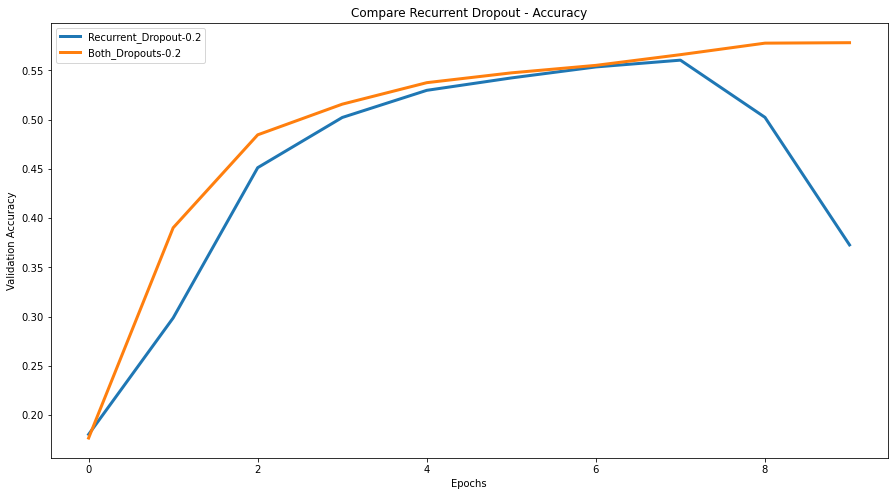

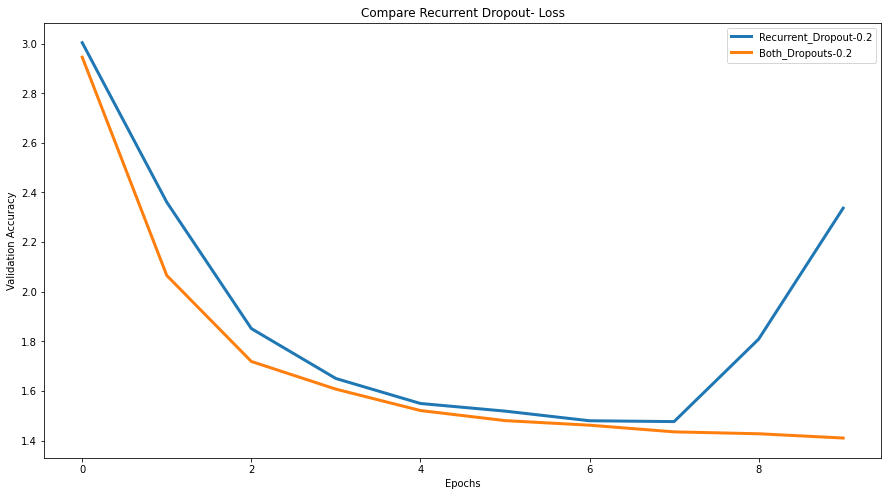

In [7]:
plot_graph(accuracy_measures, "Compare Recurrent Dropout - Accuracy")
plot_graph(loss_measures, "Compare Recurrent Dropout- Loss")

From the results above, the model with both forms of Dropout seem to be the better option, as it could get slightly higher accuracy and yet overfit slightly slower, as we can see in the validation loss. 

### Model 12 - Current State of the Model

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(192, return_sequences=True, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(384, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 192)           190464    
                                                                 
 lstm_1 (LSTM)               (None, 384)               886272    
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________


In [5]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=1024,
            epochs=10,
            validation_split = 0.3,
            )

model.save('part2_model12.h5')

Epoch 1/10
103/103 [==============================] - 49s 415ms/step - loss: 3.0507 - accuracy: 0.1831 - val_loss: 2.5866 - val_accuracy: 0.2768
Epoch 2/10
103/103 [==============================] - 42s 407ms/step - loss: 2.3274 - accuracy: 0.3304 - val_loss: 2.0430 - val_accuracy: 0.3987
Epoch 3/10
103/103 [==============================] - 43s 421ms/step - loss: 1.8873 - accuracy: 0.4398 - val_loss: 1.7215 - val_accuracy: 0.4878
Epoch 4/10
103/103 [==============================] - 44s 425ms/step - loss: 1.7125 - accuracy: 0.4916 - val_loss: 1.6004 - val_accuracy: 0.5153
Epoch 5/10
103/103 [==============================] - 45s 437ms/step - loss: 1.5656 - accuracy: 0.5253 - val_loss: 1.5542 - val_accuracy: 0.5292
Epoch 6/10
103/103 [==============================] - 46s 451ms/step - loss: 1.4979 - accuracy: 0.5428 - val_loss: 1.5097 - val_accuracy: 0.5486
Epoch 7/10
103/103 [==============================] - 47s 456ms/step - loss: 1.9621 - accuracy: 0.4610 - val_loss: 1.4894 - val_ac

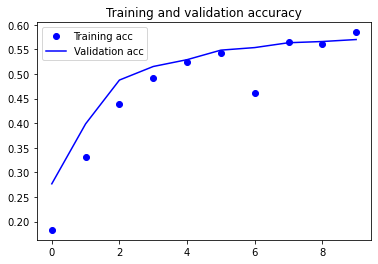

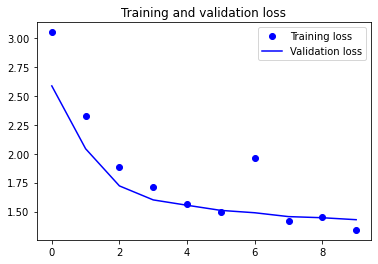

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [8]:

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

--- Generating with seed: "or quills and 
parchment. over the noise, snape said, “and a"
------ temperature: 0.2
or quills and 
parchment. over the noise, snape said, “and a scared 
and the game man of the thought it was 
the staring the car than the stared to the course 
staring the car from the strain the stool had 
dumbledore was staring the staring harry’s 
was a short of the course, the dursleys was a 
scarer the stool had been that the staring to the 
could staring the dursleys was a hand and the 
course, harry had been a staring the first that 
had now a stari
------ temperature: 0.5
or quills and 
parchment. over the noise, snape said, “and a stood 
of the man the word of the hall. 

“so wearing they were ron was on the course like 
hurry and the standing out of the car word and have 
books and he was said, “saying that look and 
the day. 

“yeh’s the got be off the more all the dunnes, still, 
break it was so privet that dudley was 
stood in the room. he was all the room, whic

### Model 13 - Bidirectional LSTM Layers 

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(192, return_sequences=True, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.Bidirectional(layers.LSTM(384, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars)))))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 60, 192)           190464    
                                                                 
 bidirectional (Bidirectiona  (None, 768)              1772544   
 l)                                                              
                                                                 
 dropout_14 (Dropout)        (None, 768)               0         
                                                                 
 dense_24 (Dense)            (None, 55)                42295     
                                                                 
Total params: 2,005,303
Trainable params: 2,005,303
Non-trainable params: 0
_________________________________________________________________


Bidirectional basically doubles the amount of parameters of the model, so I am reducing it down to near 1 million parameters to make a fair judgement.

In [40]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.Bidirectional(layers.LSTM(256, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars)))))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 60, 128)           94208     
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 55)                28215     
                                                                 
Total params: 910,903
Trainable params: 910,903
Non-trainable params: 0
_________________________________________________________________


In [41]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


history = model.fit(x, y,
            batch_size=1024,
            epochs=10,
            validation_split = 0.3,
            )

model.save('part2_model13.h5')


Epoch 1/10
103/103 [==============================] - 68s 592ms/step - loss: 3.2228 - accuracy: 0.1556 - val_loss: 3.0894 - val_accuracy: 0.1743
Epoch 2/10
103/103 [==============================] - 59s 576ms/step - loss: 2.7431 - accuracy: 0.2480 - val_loss: 2.4395 - val_accuracy: 0.2961
Epoch 3/10
103/103 [==============================] - 59s 574ms/step - loss: 2.2148 - accuracy: 0.3550 - val_loss: 1.9692 - val_accuracy: 0.4166
Epoch 4/10
103/103 [==============================] - 60s 580ms/step - loss: 1.8902 - accuracy: 0.4424 - val_loss: 1.7483 - val_accuracy: 0.4850
Epoch 5/10
103/103 [==============================] - 59s 576ms/step - loss: 1.7191 - accuracy: 0.4896 - val_loss: 1.6296 - val_accuracy: 0.5143
Epoch 6/10
103/103 [==============================] - 60s 579ms/step - loss: 1.6066 - accuracy: 0.5162 - val_loss: 1.5651 - val_accuracy: 0.5340
Epoch 7/10
103/103 [==============================] - 61s 592ms/step - loss: 1.5338 - accuracy: 0.5351 - val_loss: 1.5175 - val_ac

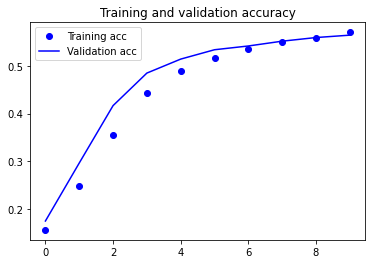

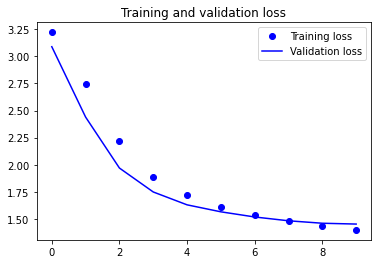

--- Generating with seed: " around them. 

“stop moving!” hermione ordered them. “i kno"
------ temperature: 0.2
 around them. 

“stop moving!” hermione ordered them. “i know who 
stood the good the stroom the bars of the stranger 
stranger and the stroom the good the stroom the 
trouble and the stook and the started to the started 
the stranger with his face was a sing the first to 
the trouble professor mcgonagall started to the 
birst the stook and the stroom and said and the 
stroom the first the stook and the stranger to start 
the hat the stranger to the counti
------ temperature: 0.5
 around them. 

“stop moving!” hermione ordered them. “i know you?” 

“i suppose he’s being a seat back to be before 
tome harry asked to finding his face of the stook 
and gave they were his eyes eyes of the birror did 
what and the sight once with his seemed his care and 
and the books as uncle vernon had never had got to 
find him out of the sade complater to see they 
shouldn’t have to the bit o

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

### Models 14 and 15 - Comparision: With and Without Bidirectional LSTM 

Epochs increased to 15 to better see where the models would overfit.

In [22]:
accuracy_measures = {}
loss_measures = {}

from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.Bidirectional(layers.LSTM(256, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars)))))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_name = "With-Bidirectional"


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


bidirectional_history = model.fit(x, y,
            batch_size=1024,
            epochs=15,
            validation_split = 0.3,
            )

model.save = "part2_model14.h5"

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()
    
accuracy_measures[model_name] = bidirectional_history.history["val_accuracy"]
loss_measures[model_name] = bidirectional_history.history["val_loss"]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           94208     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              788480    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 55)                28215     
                                                                 
Total params: 910,903
Trainable params: 910,903
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
103/103 [==============================] - 69s 598ms/step - loss: 3.2817 - accuracy: 0.1566 - val_loss: 3

In [23]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

model = keras.models.Sequential()
model.add(layers.LSTM(192, return_sequences=True, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(384, recurrent_dropout = 0.2, input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_name = "Without-Bidirectional"


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"


bidirectional_history = model.fit(x, y,
            batch_size=1024,
            epochs=15,
            validation_split = 0.3,
            )

model.save('part2_model15.h5')


# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()
    
accuracy_measures[model_name] = bidirectional_history.history["val_accuracy"]
loss_measures[model_name] = bidirectional_history.history["val_loss"]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 192)           190464    
                                                                 
 lstm_3 (LSTM)               (None, 384)               886272    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 55)                21175     
                                                                 
Total params: 1,097,911
Trainable params: 1,097,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
103/103 [==============================] - 47s 407ms/step - loss: 3.1473 - accuracy: 0.1657 - val_loss: 3.0169 - val_accuracy: 0.2116
Epoch 2/15
103/103 [===========

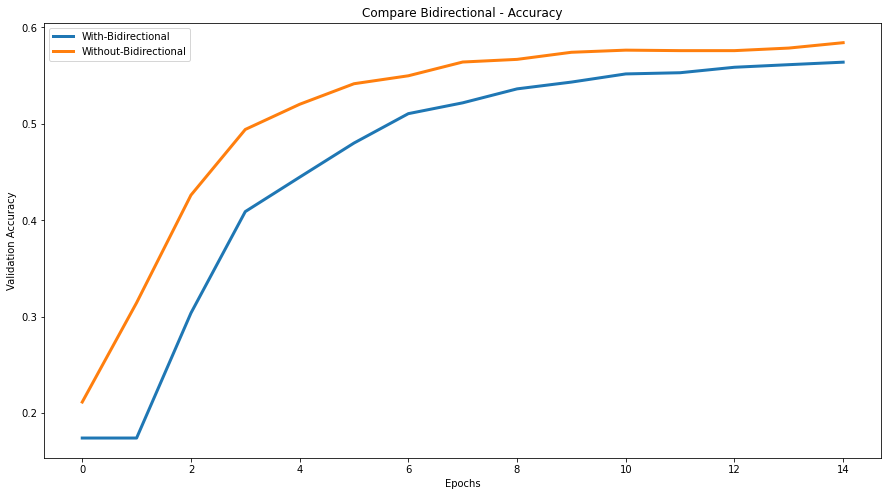

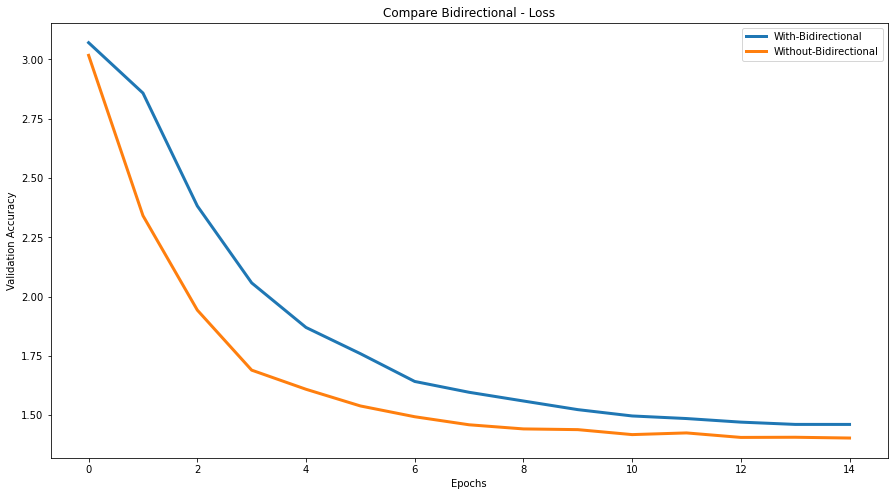

In [26]:
plot_graph(accuracy_measures, "Compare Bidirectional - Accuracy")
plot_graph(loss_measures, "Compare Bidirectional - Loss")

## Step 3 – Use the developed Model to generate the characters / sentences

In [90]:
# takes the user input
# text_input = np.array([input()])
text_input = input()
length = 60
text_input = text_input.rjust(length)

harry potter shouted to him


In [91]:
# encode the user input
# text_input = np.char.encode(text_input, encoding='UTF-8')
print(text_input)
print(len(text_input))

                                 harry potter shouted to him
60


In [89]:
# Use the Best Model to generate 400 characters
import random
import sys

model = keras.models.load_model('part2_model15.h5')

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

# # Select a text seed at random
# start_index = random.randint(0, len(text) - maxlen - 1)
# generated_text_initial = text[start_index: start_index + maxlen]
# print('--- Generating with seed: "' + generated_text_initial + '"')


print('--- Generating with seed: "' + text_input + '"')

for temperature in [0.2, 0.4, 0.5, 1.0]:
    generated_text = text_input
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


--- Generating with seed: "                                 harry potter shouted to him"
------ temperature: 0.2
                                 harry potter shouted to him — ” 

“you could be something that what if you’re was a 
stop him — ” 

“i don’t was a bottle from the corridor. harry had 
been and started the ground the green and the 
house had going to the stood to the corridor. 

“the stop you’re never tried to be sorry that the 
could see you’re all the corridor. 

“that’s all the corridor, which was a stood that the 
house except that had been and started
------ temperature: 0.4
                                 harry potter shouted to him and the door she felt at 
the green hand and started at the street to the cat of 
a bit of the stranged the books and harry had been 
had had been and a cowling had never have vailed 
whispered the stranger that called in a lot, dudley 
both was wand out of the corner of the ground. 

harry had a boy could see him a first years and he’d 
g